# Exercise 2
## Cleaning the data

Now we have the data downloaded. We can will have to clean the data so that it is appropriate for training.

In [1]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('data/breast_cancer_feats.csv')

In [2]:
data.head(n=20)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,40-49,premeno,20-24,0-2,no,2,right,left_up,no


Numerical column
- deg-malig

Binary columns
- breast
- irradiat

Categorical columns to convert to dummy columns
- age
- menopause
- tumor-size
- inv-nodes
- node-caps
- breast-quad

We can use the `describe` function to examine some properties of the numerical column

In [3]:
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


We can also look at the distribution of numerical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4a0518>]],
      dtype=object)

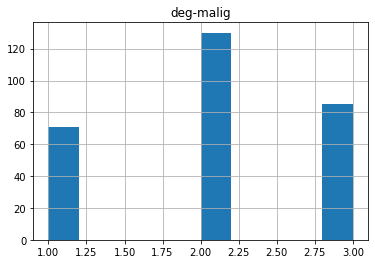

In [4]:
data.hist()

### Converting non-numercal columns to numerical

#### Binary columns

Convert 'default' column to binary, rename to 'is_default'

In [5]:
data['breast'].value_counts()

left     152
right    134
Name: breast, dtype: int64

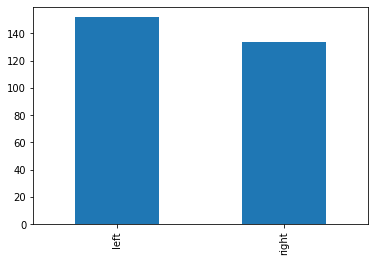

In [6]:
data['breast'].value_counts().plot(kind='bar')

We can see that there is an almost equal number of cases between breast cancer in the left and right breast. We will make a new numerical column indicating whether it is the left breast or not since that occurs with the highest frequency.

In [7]:
data['is_left'] = data['breast'].apply(lambda row: 1 if row == 'left' else 0)

Let's look at the two columns side-by-side to get an understanding

In [8]:
data[['breast', 'is_left']].tail()

,breast,is_left
281,left,1
282,left,1
283,right,0
284,left,1
285,left,1


Do the same for the column named `irradiat`, confirming that there are only two options, yes, and no

In [9]:
data['irradiat'].value_counts()

no     218
yes     68
Name: irradiat, dtype: int64

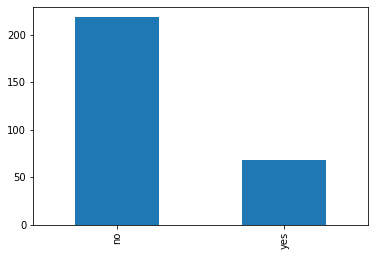

In [10]:
data['irradiat'].value_counts().plot(kind='bar')

In [11]:
data['is_irradiat'] = data['irradiat'].apply(lambda row: 1 if row == 'yes' else 0)

### Categorical columns
The other columns are categorical so we will have to deal with them a little differently.

In [12]:
data['age'].value_counts()

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

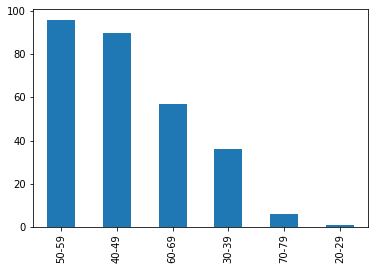

In [13]:
data['age'].value_counts().plot(kind='bar')

We can see that there are six options for the `age` column, so we will make this a categorical column.

We can do this using the `get_dummies` function in the pandas library

In [14]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the

In [15]:
age_dummies = pd.get_dummies(data['age'], prefix='age')
pd.concat([data['age'], age_dummies], axis=1).head(n=10)

,age,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79
0,30-39,0,1,0,0,0,0
1,40-49,0,0,1,0,0,0
2,40-49,0,0,1,0,0,0
3,60-69,0,0,0,0,1,0
4,40-49,0,0,1,0,0,0
5,60-69,0,0,0,0,1,0
6,50-59,0,0,0,1,0,0
7,60-69,0,0,0,0,1,0
8,40-49,0,0,1,0,0,0
9,40-49,0,0,1,0,0,0


We can see that there is a bit of redundant information here, we have six total options, but we know that whenever five of the columns are zero, the other column *has* to be 1, since everyone has to fall into one of the six options. We can then drop one of the columns and assume that a zero in the remaining columns means that the dropped column is equal to one.

Here we will drop the `age_20-29` column since it occurs with the least frequency.

In [16]:
age_dummies.drop('age_20-29', axis=1, inplace=True)

In [17]:
age_dummies.head()

,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


Now we will join it back to the original dataset

In [18]:
data = pd.concat([data, age_dummies], axis=1)

Let's do the same for the `menopause`, `tumor-size`, and `inv-nodes`, `node-caps`, and the `breast-quad` columns

In [19]:
data['menopause'].value_counts()

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

The `lt40` value seems most appropriate to drop here since it occurs least frequently, a value of zero in the columns for `premeno` and `ge40` indicate a positive indication for `lt40`.

In [20]:
colname = 'menopause'
menopause_dummies = pd.get_dummies(data[colname], prefix=colname)
menopause_dummies.drop(colname+'_lt40', axis=1, inplace=True)

In [21]:
data = pd.concat([data, menopause_dummies], axis=1)

Repeat for `tumor-size`

In [22]:
data['tumor-size'].value_counts()

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

Here, we will remove the value corresponding to `50-54` for continuity.

In [23]:
colname = 'tumor-size'
tumor_dummies = pd.get_dummies(data[colname], prefix=colname)
tumor_dummies.drop(colname+'_50-54', axis=1, inplace=True)

In [24]:
data = pd.concat([data, tumor_dummies], axis=1)

And for the `inv-nodes` field

In [25]:
data['inv-nodes'].value_counts()

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

In [26]:
colname = 'inv-nodes'
inv_nodes_dummies = pd.get_dummies(data[colname], prefix=colname)
inv_nodes_dummies.drop(colname+'_24-26', axis=1, inplace=True)

In [27]:
data = pd.concat([data, inv_nodes_dummies], axis=1)

And for the `nodes-caps` field

In [28]:
data['node-caps'].value_counts()

no     222
yes     56
?        8
Name: node-caps, dtype: int64

Here we will drop the value for `?`

In [29]:
colname = 'node-caps'
node_caps_dummies = pd.get_dummies(data[colname], prefix=colname)
node_caps_dummies.drop(colname+'_?', axis=1, inplace=True)

In [30]:
data = pd.concat([data, node_caps_dummies], axis=1)

In [31]:
data.iloc[0]

age                     30-39
menopause             premeno
tumor-size              30-34
inv-nodes                 0-2
node-caps                  no
deg-malig                   3
breast                   left
breast-quad          left_low
irradiat                   no
is_left                     1
is_irradiat                 0
age_30-39                   1
age_40-49                   0
age_50-59                   0
age_60-69                   0
age_70-79                   0
menopause_ge40              0
menopause_premeno           1
tumor-size_0-4              0
tumor-size_10-14            0
tumor-size_15-19            0
tumor-size_20-24            0
tumor-size_25-29            0
tumor-size_30-34            1
tumor-size_35-39            0
tumor-size_40-44            0
tumor-size_45-49            0
tumor-size_5-9              0
inv-nodes_0-2               1
inv-nodes_12-14             0
inv-nodes_15-17             0
inv-nodes_3-5               0
inv-nodes_6-8               0
inv-nodes_

In [32]:
data.drop(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], axis=1, inplace=True, errors='ignore')

Let's check the data types to confirm that that the are all numerical

In [33]:
data.dtypes

deg-malig            int64
is_left              int64
is_irradiat          int64
age_30-39            uint8
age_40-49            uint8
age_50-59            uint8
age_60-69            uint8
age_70-79            uint8
menopause_ge40       uint8
menopause_premeno    uint8
tumor-size_0-4       uint8
tumor-size_10-14     uint8
tumor-size_15-19     uint8
tumor-size_20-24     uint8
tumor-size_25-29     uint8
tumor-size_30-34     uint8
tumor-size_35-39     uint8
tumor-size_40-44     uint8
tumor-size_45-49     uint8
tumor-size_5-9       uint8
inv-nodes_0-2        uint8
inv-nodes_12-14      uint8
inv-nodes_15-17      uint8
inv-nodes_3-5        uint8
inv-nodes_6-8        uint8
inv-nodes_9-11       uint8
node-caps_no         uint8
node-caps_yes        uint8
dtype: object

While the data may not be the most appropriate form to train a model, we can techincally train the model with it.
Later on in the lesson we will tackle some more appropriate methods to represent the variables that will result in better model performance.

We will save the models to a csv file

In [34]:
data.to_csv('data/breast_cancer_feats_e2.csv', index=False)

#### Target variable

We can do a similar task to the target variable by making all the columns into numerical data types.
We start by loading it in.

In [35]:
target = pd.read_csv('data/breast_cancer_target.csv')
target.head(n=10)

,Class
0,no-recurrence-events
1,no-recurrence-events
2,no-recurrence-events
3,no-recurrence-events
4,no-recurrence-events
5,no-recurrence-events
6,no-recurrence-events
7,no-recurrence-events
8,no-recurrence-events
9,no-recurrence-events


This one should be easy since there's just one column, let's verify that there are only two options.

In [36]:
target['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

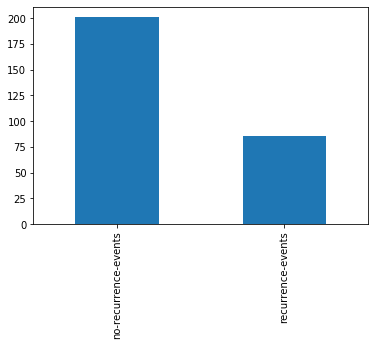

In [37]:
target['Class'].value_counts().plot(kind='bar')

In [38]:
target['Class'] = target['Class'].apply(lambda row: 1 if row=='recurrence-events' else 0)
target.head(n=10)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Save the target data to csv

In [39]:
target.to_csv('data/breast_cancer_target_e2.csv', index=False)